# Лабораторная работа №4. Кластеризация

**Цель работы**: изучение алгоритмов кластеризации, приобретение навыков оценки качества разбиения данных на кластеры и интерпретации результатов.

**Датасет**: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

**Описание**:

Это набор данных для идентификации стекла от UCI. Он содержит 10 атрибутов, включая идентификатор. Ответ: тип стекла (7 дискретных значений).

| Переменная               | Описание (на русском)                                                                                                                 |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------- |
|  radius_mean             | Средний радиус — среднее расстояние от центра до точек на границе ядра                                          |
|  texture_mean            | Текстура — стандартное отклонение значений серого в изображении ядра                                           |
|  perimeter_mean          | Периметр — средняя длина контура ядра                                                                         |
|  area_mean               | Площадь — средняя площадь ядра                                                                                |
|  smoothness_mean         | Гладкость — изменение длины радиусов ядра (локальная вариация)                                         |
|  compactness_mean        | Компактность — (perimeter² / area – 1.0), мера “плотности/извилистости” формы ядра                          |
|  concavity_mean          | Вогнутость — степень выраженности вогнутых участков контура ядра                                           |
|  concave points_mean     | Количество вогнутых участков — число вогнутых участков на контуре ядра                                       |
|  symmetry_mean           | Симметрия — мера симметрии формы ядра                                                                        |
|  fractal_dimension_mean  | Фрактальная размерность — характеристика сложности контура (приближение “береговой линии” – 1)         |
|  radius_se               | Стандартная ошибка радиуса — вариабельность радиуса по выборке измерений                                              |
|  texture_se              | Стандартная ошибка текстуры — вариабельность текстуры по измерениям                                           |
|  perimeter_se            | Стандартная ошибка периметра — вариабельность периметра по выборке измерений                                     |
|  area_se                 | Стандартная ошибка площади — вариабельность площади ядра                                                                |
|  smoothness_se           | Стандартная ошибка гладкости — вариабельность гладкости контуров                                               |
|  compactness_se          | Стандартная ошибка компактности — вариабельность формы ядра по компактности                                           |
|  concavity_se            | Стандартная ошибка вогнутости — вариабельность вогнутости контура                                               |
|  concave points_se       | Стандартная ошибка количества вогнутых участков — вариабельность числа вогнутых участков контура                 |
|  symmetry_se             | Стандартная ошибка симметрии — вариабельность симметрии формы ядра                                               |
|  fractal_dimension_se    | Стандартная ошибка фрактальной размерности — вариабельность оценки сложности контура                            |
|  radius_worst            | “Худший” (наибольший) радиус — как выше, но максимальное / наиболее выраженное значение по измерениям                |
|  texture_worst           | “Худшая” текстура — аналогично, максимальное значение текстурной неоднородности                                  |
|  perimeter_worst         | “Худший” периметр — максимальная длина контура ядра из выборки измерений                                               |
|  area_worst              | “Худшая” площадь — максимальная площадь ядра из выборки измерений                                               |
|  smoothness_worst        | “Худшая” гладкость — максимальное значение локальной вариации радиусов                                                     |
|  compactness_worst       | “Худшая” компактность — максимальное значение (perimeter² / area – 1.0) по измерениям                                   |
|  concavity_worst         | “Худшая” вогнутость — максимальная степень выраженности вогнутых участков контура                              |
|  concave points_worst    | “Худшие” вогнутые участки — максимальное число вогнутых участков на контуре                                    |
|  symmetry_worst          | “Худшая” симметрия — максимальное значение меры асимметрии формы ядра                                                 |
|  fractal_dimension_worst | “Худшая” фрактальная размерность — максимальное значение оценки сложности контура                               |
|  diagnosis               | Диагноз: `M` = злокачественная опухоль (malignant), `B` = доброкачественная (benign) — целевая метка. |

---

## Описание данных

In [244]:
import pandas as pd

df = pd.read_csv('..\datasets\data.csv')

print(df.info())
print('\n', df)
print('\nРазмерность:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Artur\AppData\Local\Temp\ipykernel_26640\978429226.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\data.csv')


Убираем бинарные/категориальные переменные

In [245]:
df_copy = df.copy()
df = df.drop(['diagnosis', 'id'], axis=1)
df = df.dropna(axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5


---

## Дескриптивный анализ, оценки информационной значимости признаков, проверка условий применения кластеризации
### Дескриптивный анализ

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

C:\Users\Artur\AppData\Local\Temp\ipykernel_26640\3053776133.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 5))


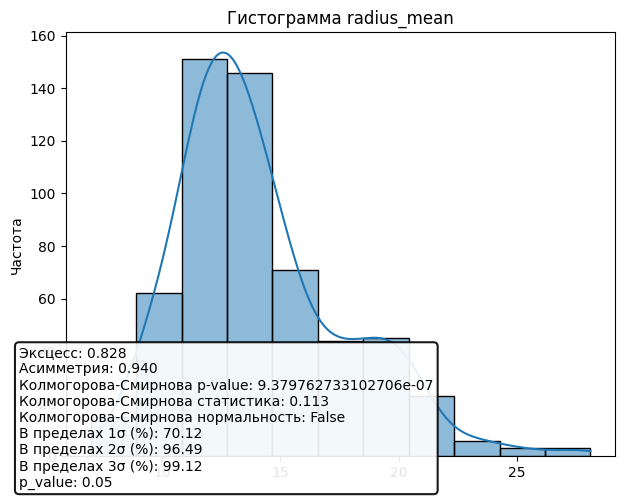

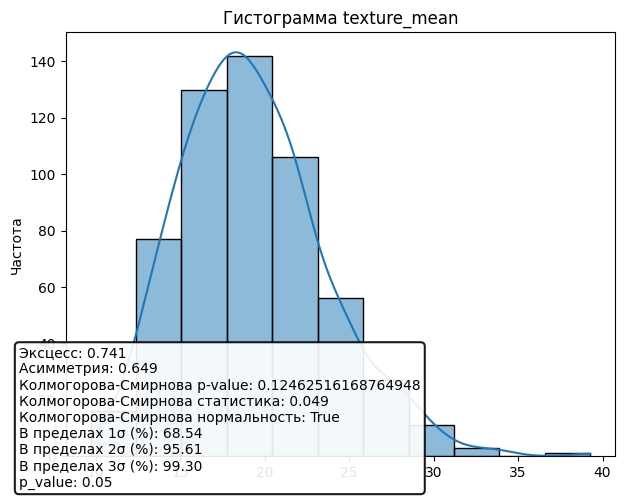

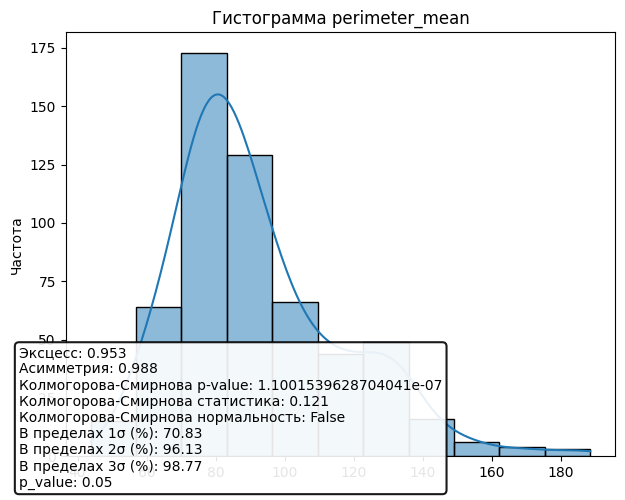

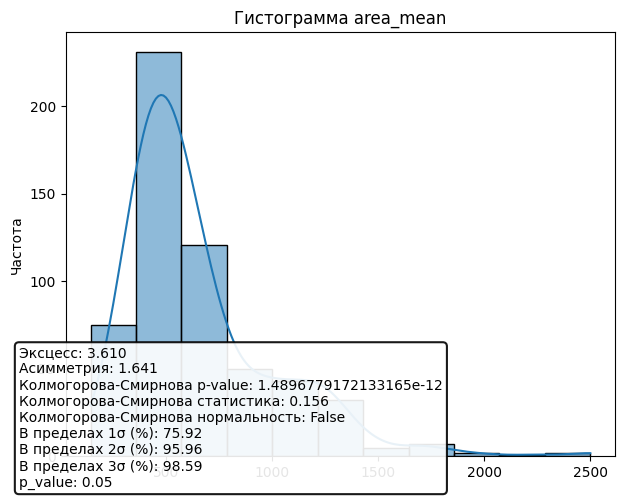

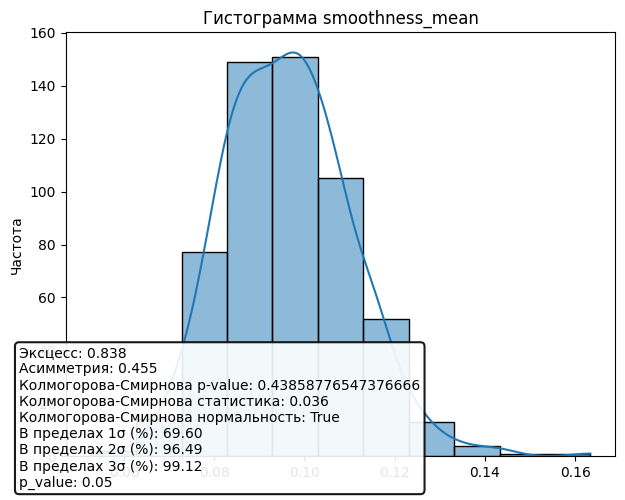

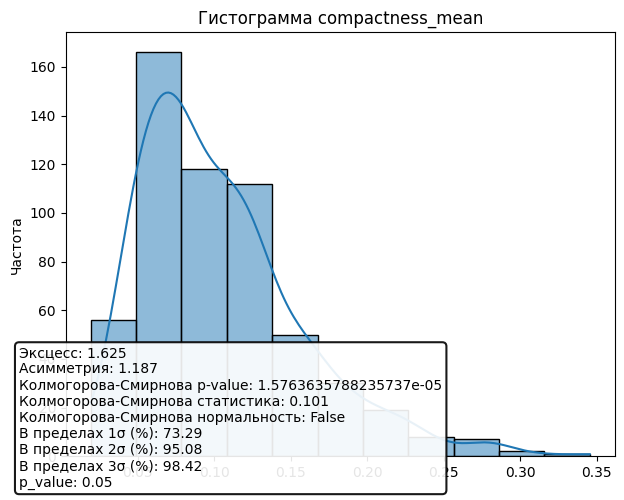

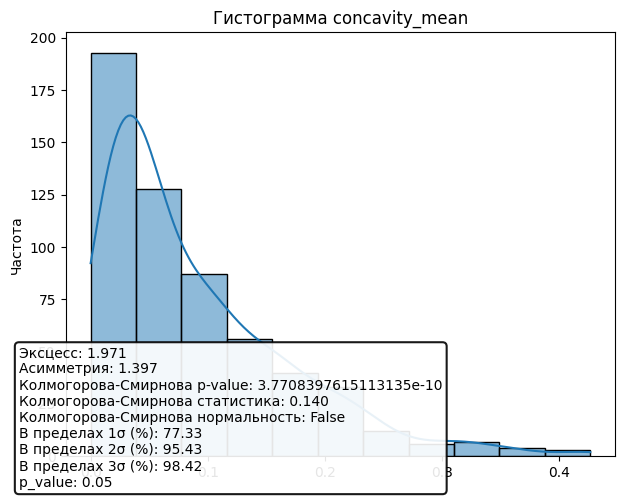

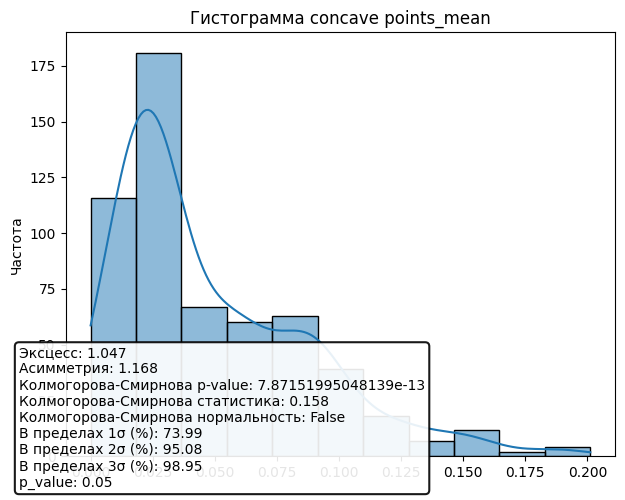

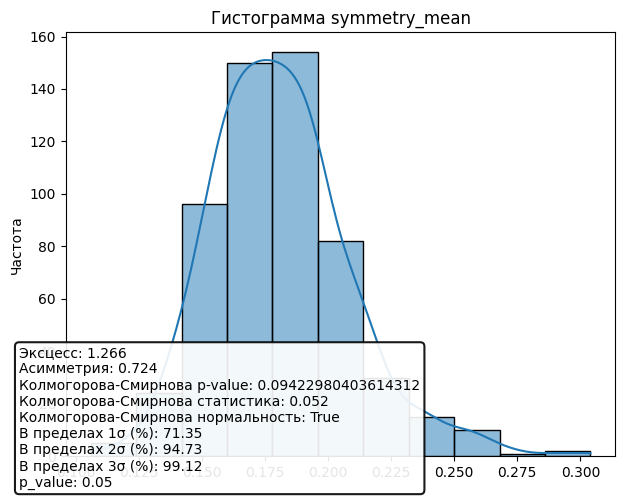

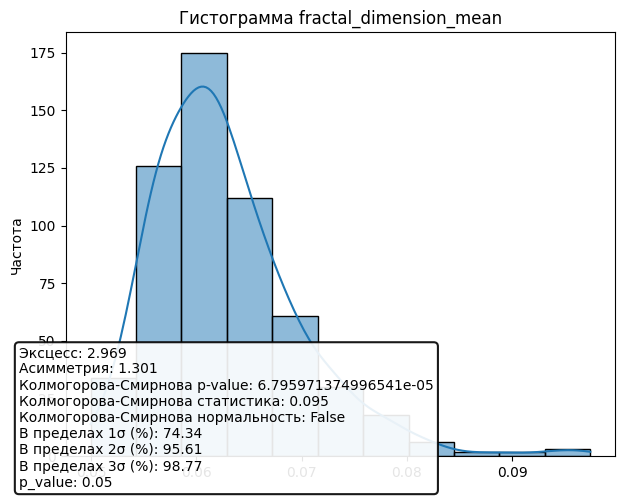

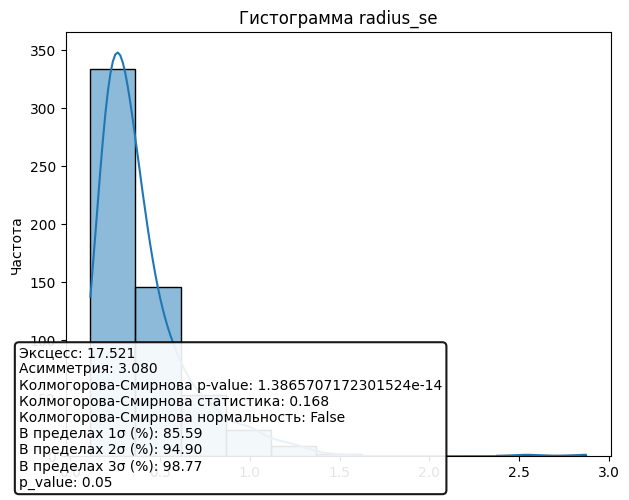

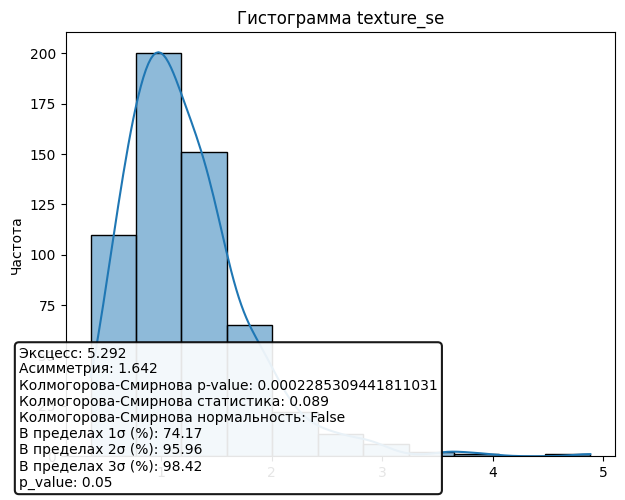

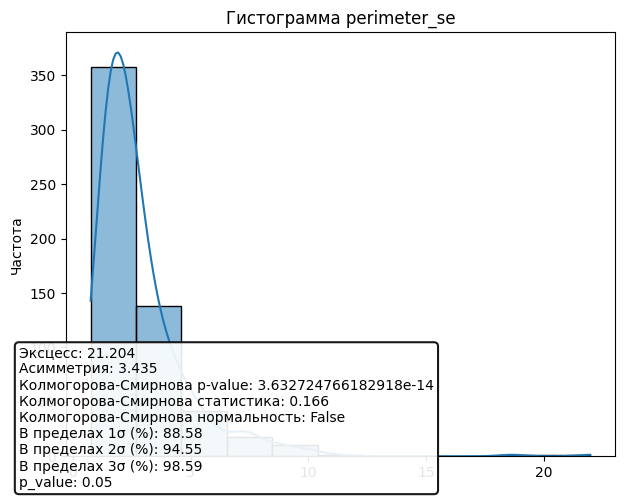

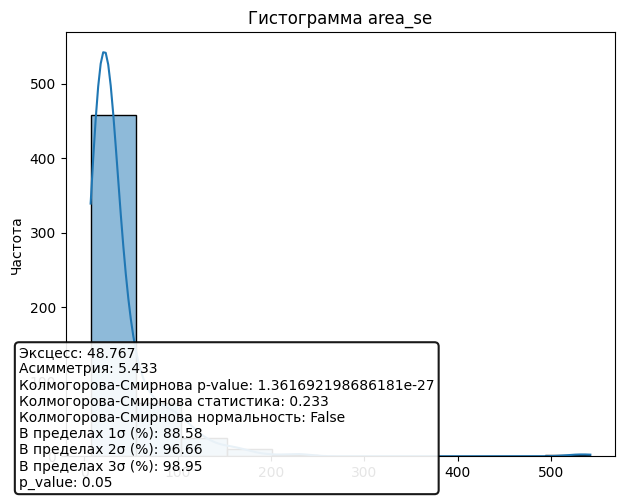

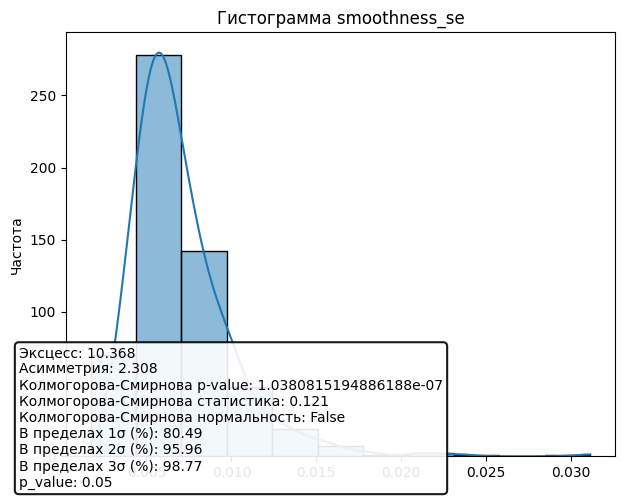

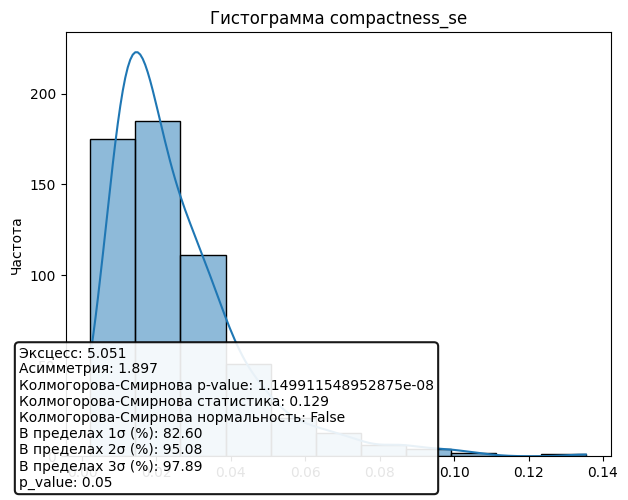

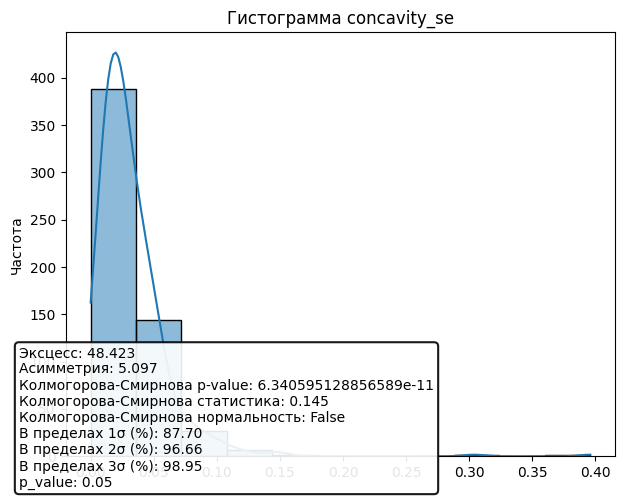

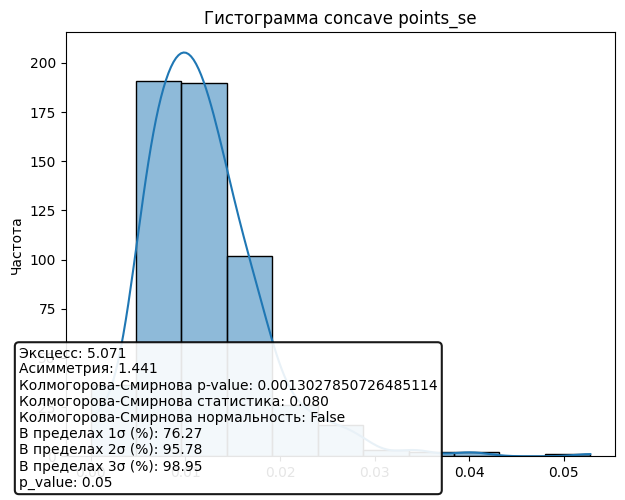

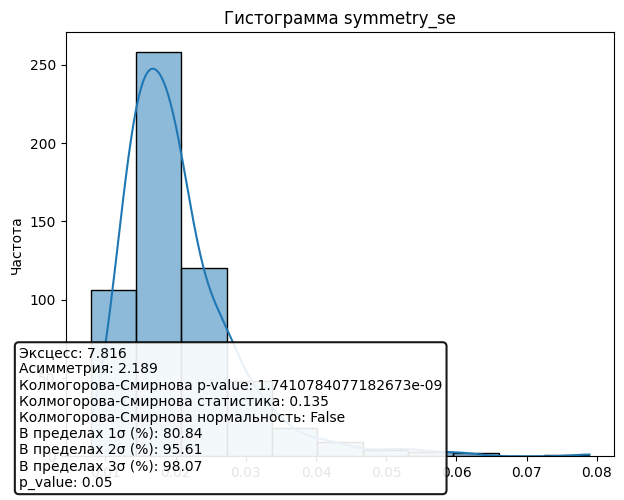

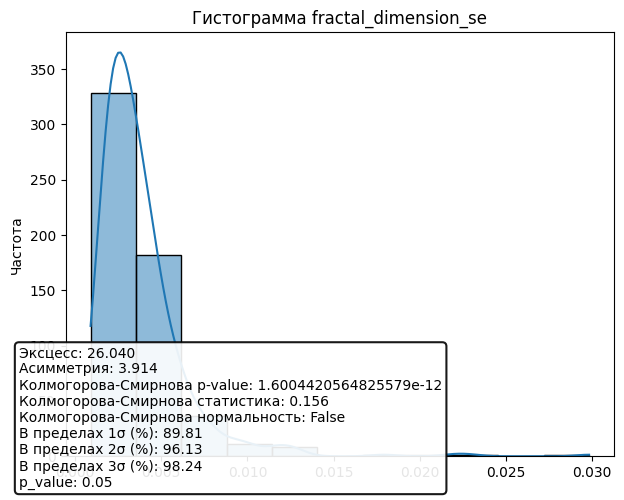

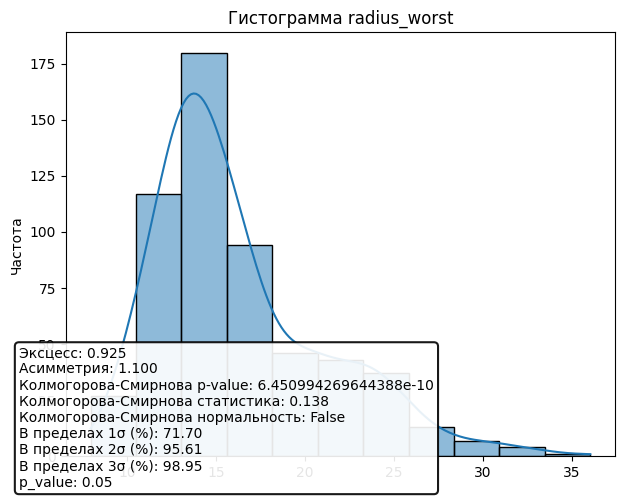

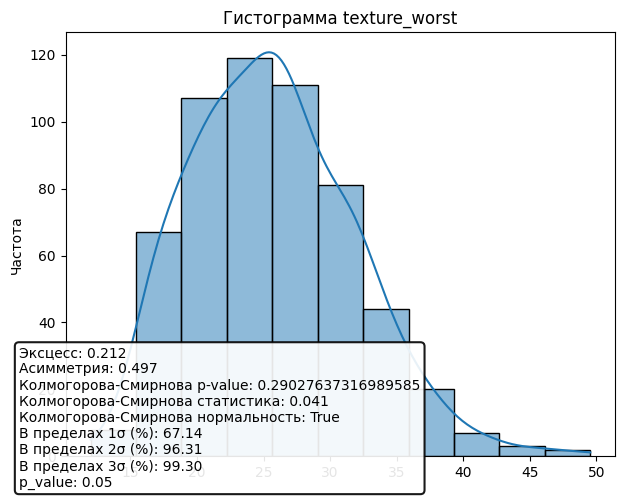

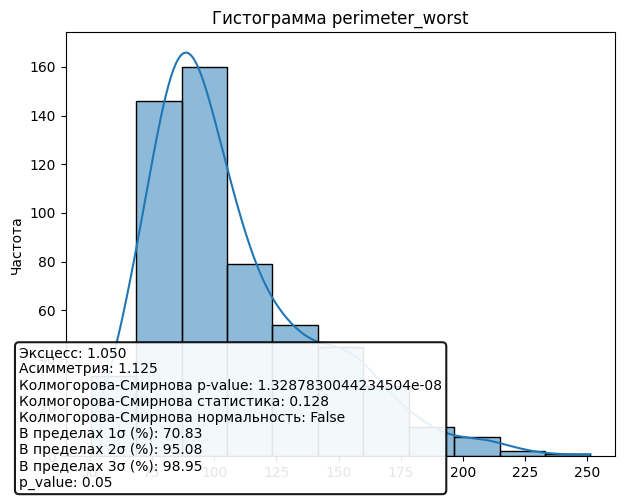

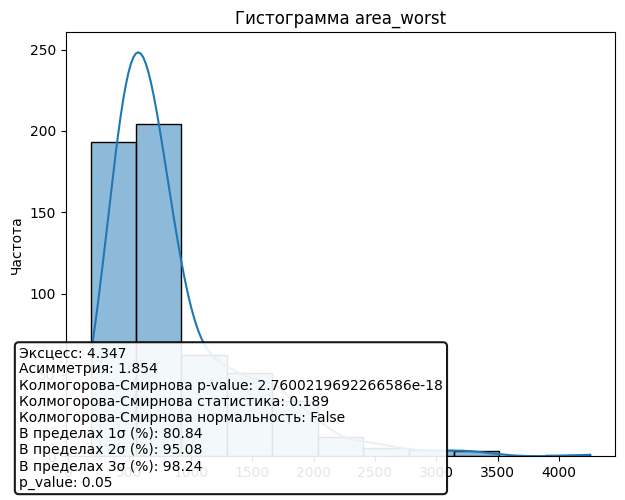

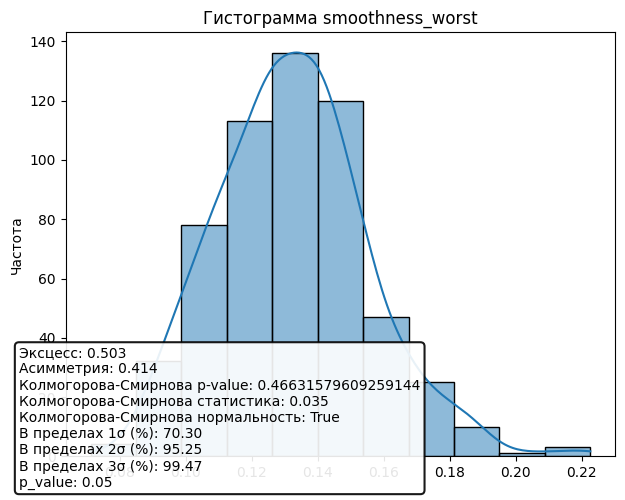

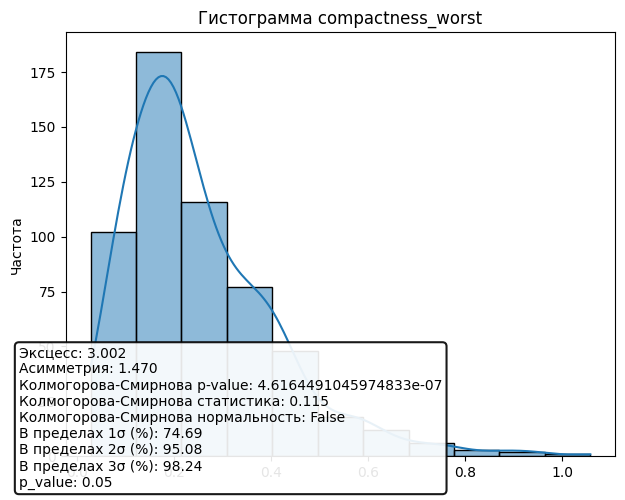

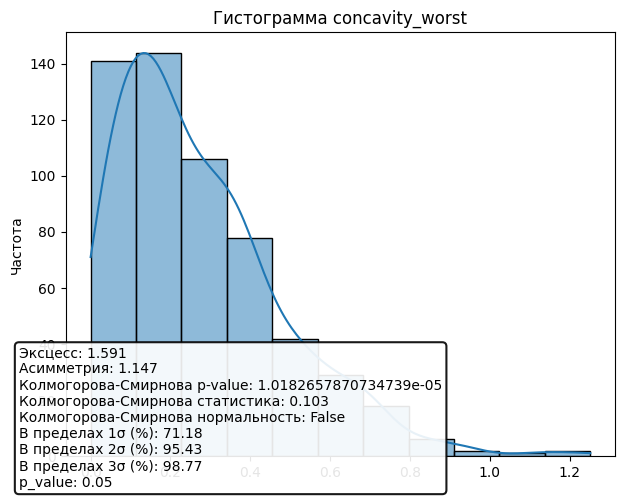

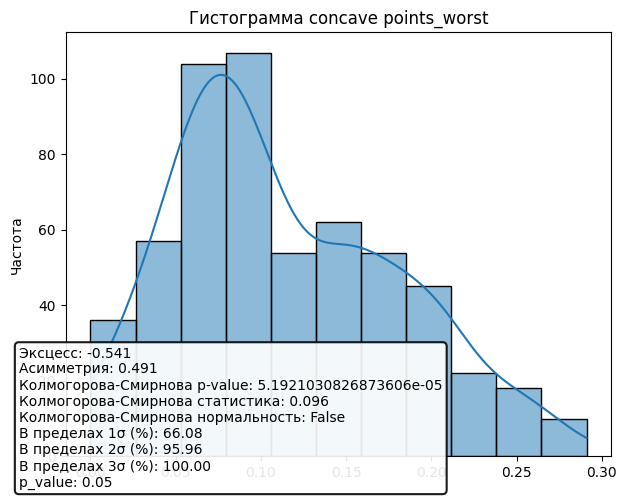

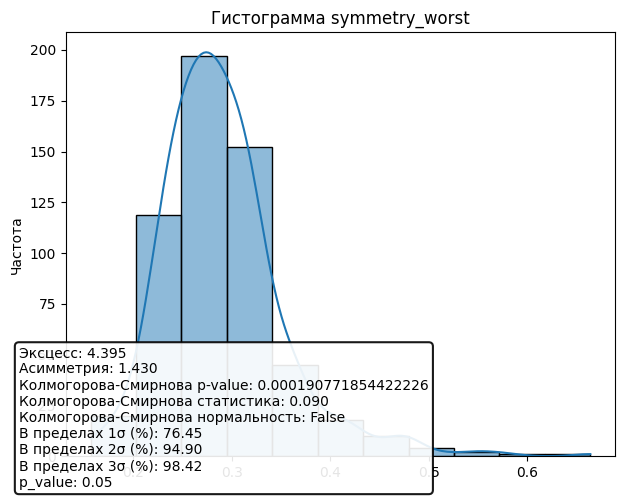

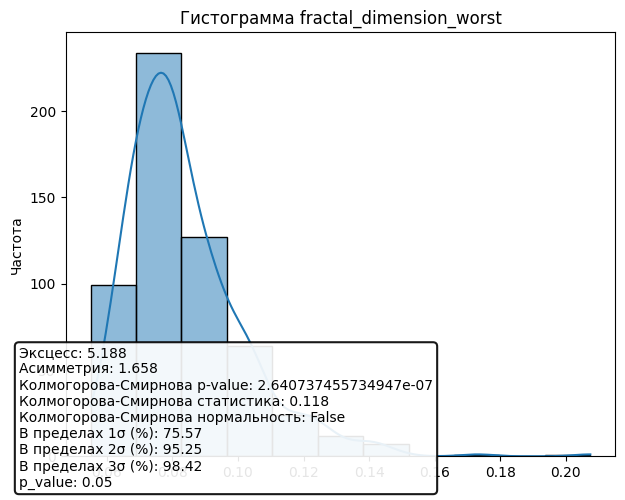

In [246]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm, skew, kurtosis, kstest
import numpy

ALPHA = 0.05

print(df.describe())

descriptions = {
    'radius_mean': '',
    'texture_mean': '',
    'perimeter_mean': '',
    'area_mean': '',
    'smoothness_mean': '',
    'compactness_mean': '',
    'concavity_mean': '',
    'concave points_mean': '',
    'symmetry_mean': '',
    'fractal_dimension_mean': '',
    'radius_se': '',
    'texture_se': '',
    'perimeter_se': '',
    'area_se': '',
    'smoothness_se': '',
    'compactness_se': '',
    'concavity_se': '',
    'concave points_se': '',
    'symmetry_se': '',
    'fractal_dimension_se': '',
    'radius_worst': '',
    'texture_worst': '',
    'perimeter_worst': '',
    'area_worst': '',
    'smoothness_worst': '',
    'compactness_worst': '',
    'concavity_worst': '',
    'concave points_worst': '',
    'symmetry_worst': '',
    'fractal_dimension_worst': ''
}

def three_sigma(column_data):
    mean_value = numpy.mean(column_data)
    std_value = numpy.std(column_data)

    bounds_1sigma = {
        'lower': mean_value - std_value,
        'upper': mean_value + std_value
    }

    bounds_2sigma = {
        'lower': mean_value - std_value * 2,
        'upper': mean_value + std_value * 2
    }

    bounds_3sigma = {
        'lower': mean_value - std_value * 3,
        'upper': mean_value + std_value * 3
    }

    total_count = len(column_data)

    within_1sigma = ((column_data >= bounds_1sigma['lower']) & 
                    (column_data <= bounds_1sigma['upper'])).sum()
    within_1sigma_pct = (within_1sigma / total_count) * 100

    within_2sigma = ((column_data >= bounds_2sigma['lower']) & 
                    (column_data <= bounds_2sigma['upper'])).sum()
    within_2sigma_pct = (within_2sigma / total_count) * 100

    within_3sigma = ((column_data >= bounds_3sigma['lower']) & 
                    (column_data <= bounds_3sigma['upper'])).sum()
    within_3sigma_pct = (within_3sigma / total_count) * 100
    
    return [within_1sigma_pct, within_2sigma_pct, within_3sigma_pct]


for _,column in enumerate(df.columns):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    three_sigma_pct = three_sigma(df[column])
    sb.histplot(df[column], kde=True, bins='sturges')
    kstestObject = kstest(df[column], 'norm', args=(numpy.mean(df[column]), numpy.std(df[column])))

    legendText = (f'Эксцесс: {kurtosis(df[column]):.3f}\n'
              f'Асимметрия: {skew(df[column]):.3f}\n'
              f'Колмогорова-Смирнова p-value: {kstestObject.pvalue}\n'
              f'Колмогорова-Смирнова статистика: {kstestObject.statistic:.3f}\n'
              f'Колмогорова-Смирнова нормальность: {kstestObject.pvalue >= ALPHA}\n'
              f'В пределах 1σ (%): {three_sigma_pct[0]:.2f}\n' # Теоретически 1σ (%) = 68.26
              f'В пределах 2σ (%): {three_sigma_pct[1]:.2f}\n' # Теоретически 2σ (%) = 95.44
              f'В пределах 3σ (%): {three_sigma_pct[2]:.2f}\n' # Теоретически 3σ (%) = 99.72
              f'p_value: {ALPHA}')
    plt.figtext(0.02, 0.01, legendText, 
            ha='left',
            va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', 
                      facecolor='white', 
                      edgecolor='black',
                      linewidth=1.5,
                      alpha=0.9))
    plt.subplots_adjust(bottom=0.5)

    plt.title(f'Гистограмма {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('Частота') 
    plt.tight_layout()


---

### Оценка информационной значимости признаков

In [247]:
variances = df.var()
print('Дисперсия признаков:')
print(variances.sort_values())

Дисперсия признаков:
fractal_dimension_se            0.000007
smoothness_se                   0.000009
concave points_se               0.000038
fractal_dimension_mean          0.000050
symmetry_se                     0.000068
smoothness_mean                 0.000198
compactness_se                  0.000321
fractal_dimension_worst         0.000326
smoothness_worst                0.000521
symmetry_mean                   0.000752
concavity_se                    0.000911
concave points_mean             0.001506
compactness_mean                0.002789
symmetry_worst                  0.003828
concave points_worst            0.004321
concavity_mean                  0.006355
compactness_worst               0.024755
concavity_worst                 0.043524
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
radius_mean                    12.418920
texture_mean                   18.498909
radius_worst                   23.36

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.340956        0.997802   0.999602   
texture_mean                0.340956      1.000000        0.348142   0.344145   
perimeter_mean              0.997802      0.348142        1.000000   0.997068   
area_mean                   0.999602      0.344145        0.997068   1.000000   
smoothness_mean             0.148510      0.024649        0.182923   0.138053   
compactness_mean            0.497578      0.266499        0.543925   0.488988   
concavity_mean              0.645728      0.342646        0.681958   0.642557   
concave points_mean         0.759702      0.306891        0.788629   0.755165   
symmetry_mean               0.120242      0.110130        0.150049   0.113928   
fractal_dimension_mean     -0.349931     -0.059303       -0.304891  -0.358425   
radius_se                   0.550247      0.363621        0.560326   0.553388   
texture_se                 -

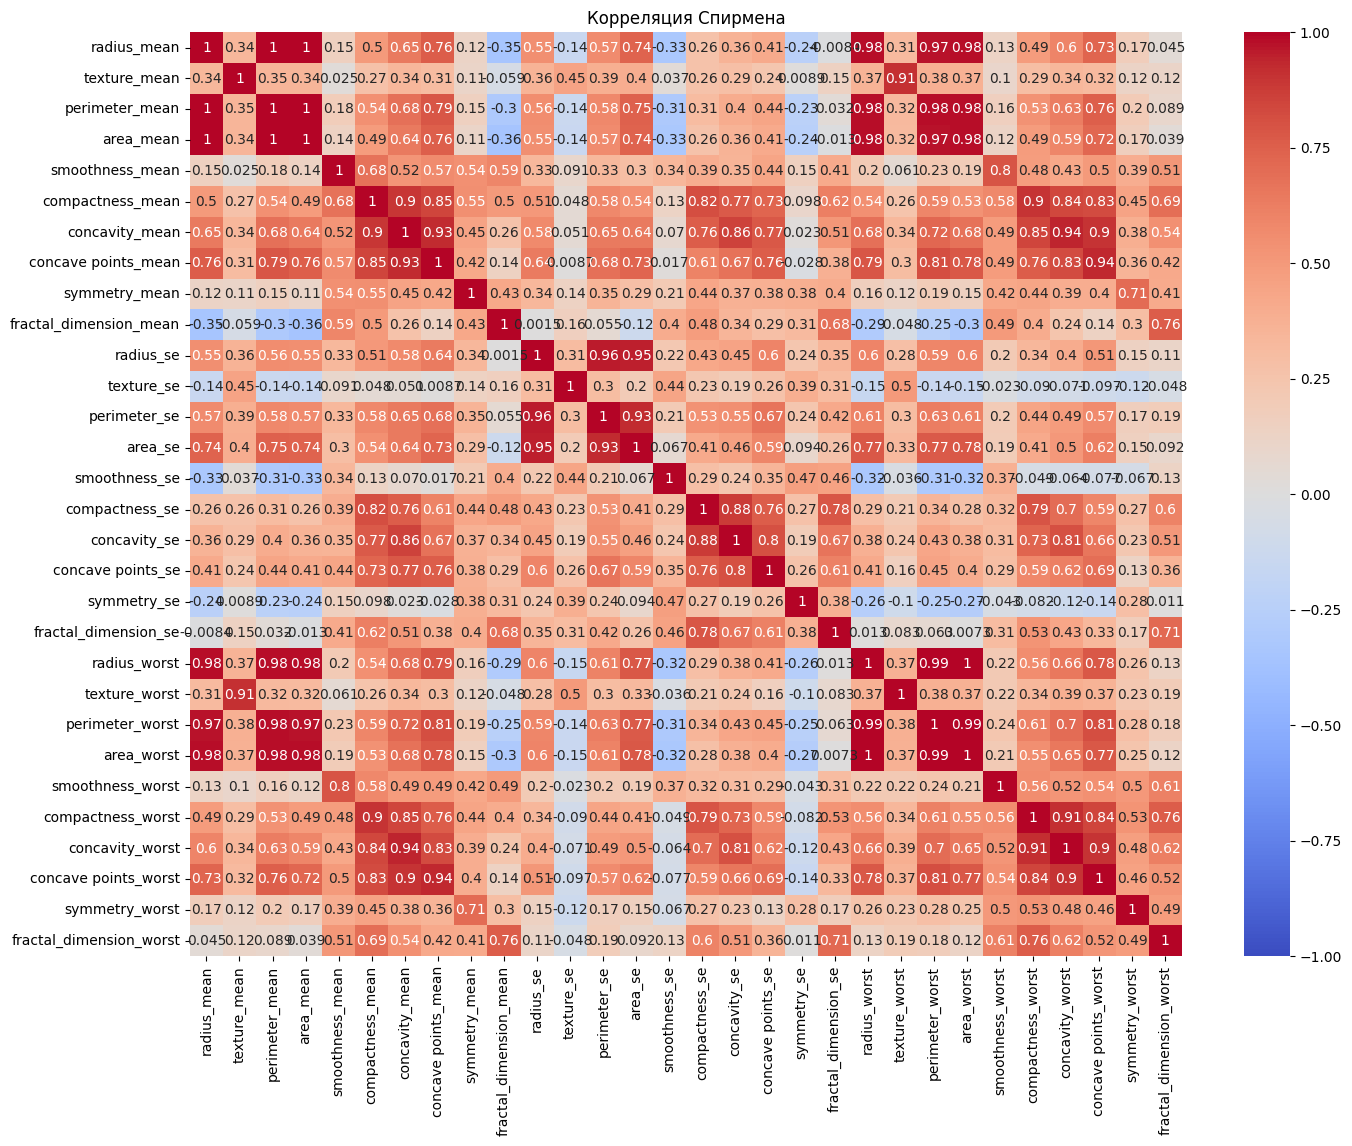

In [248]:
from scipy.stats import spearmanr

feature_columns = [col for col in df.columns if col != 'Class']
correlation_matrix = pd.DataFrame(index=feature_columns, columns=feature_columns)

for var1 in feature_columns:
    for var2 in feature_columns:
        if var1 != var2:
            corr, p_value = spearmanr(df[var1], df[var2])
            correlation_matrix.loc[var1, var2] = 'Значима' if p_value < ALPHA else 'Не значима'

spearman_corr = df[feature_columns].corr(method='spearman')

print(spearman_corr)

plt.figure(figsize=(16, 12))
sb.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Спирмена')
plt.show()


---

### Проверка условий для кластеризации

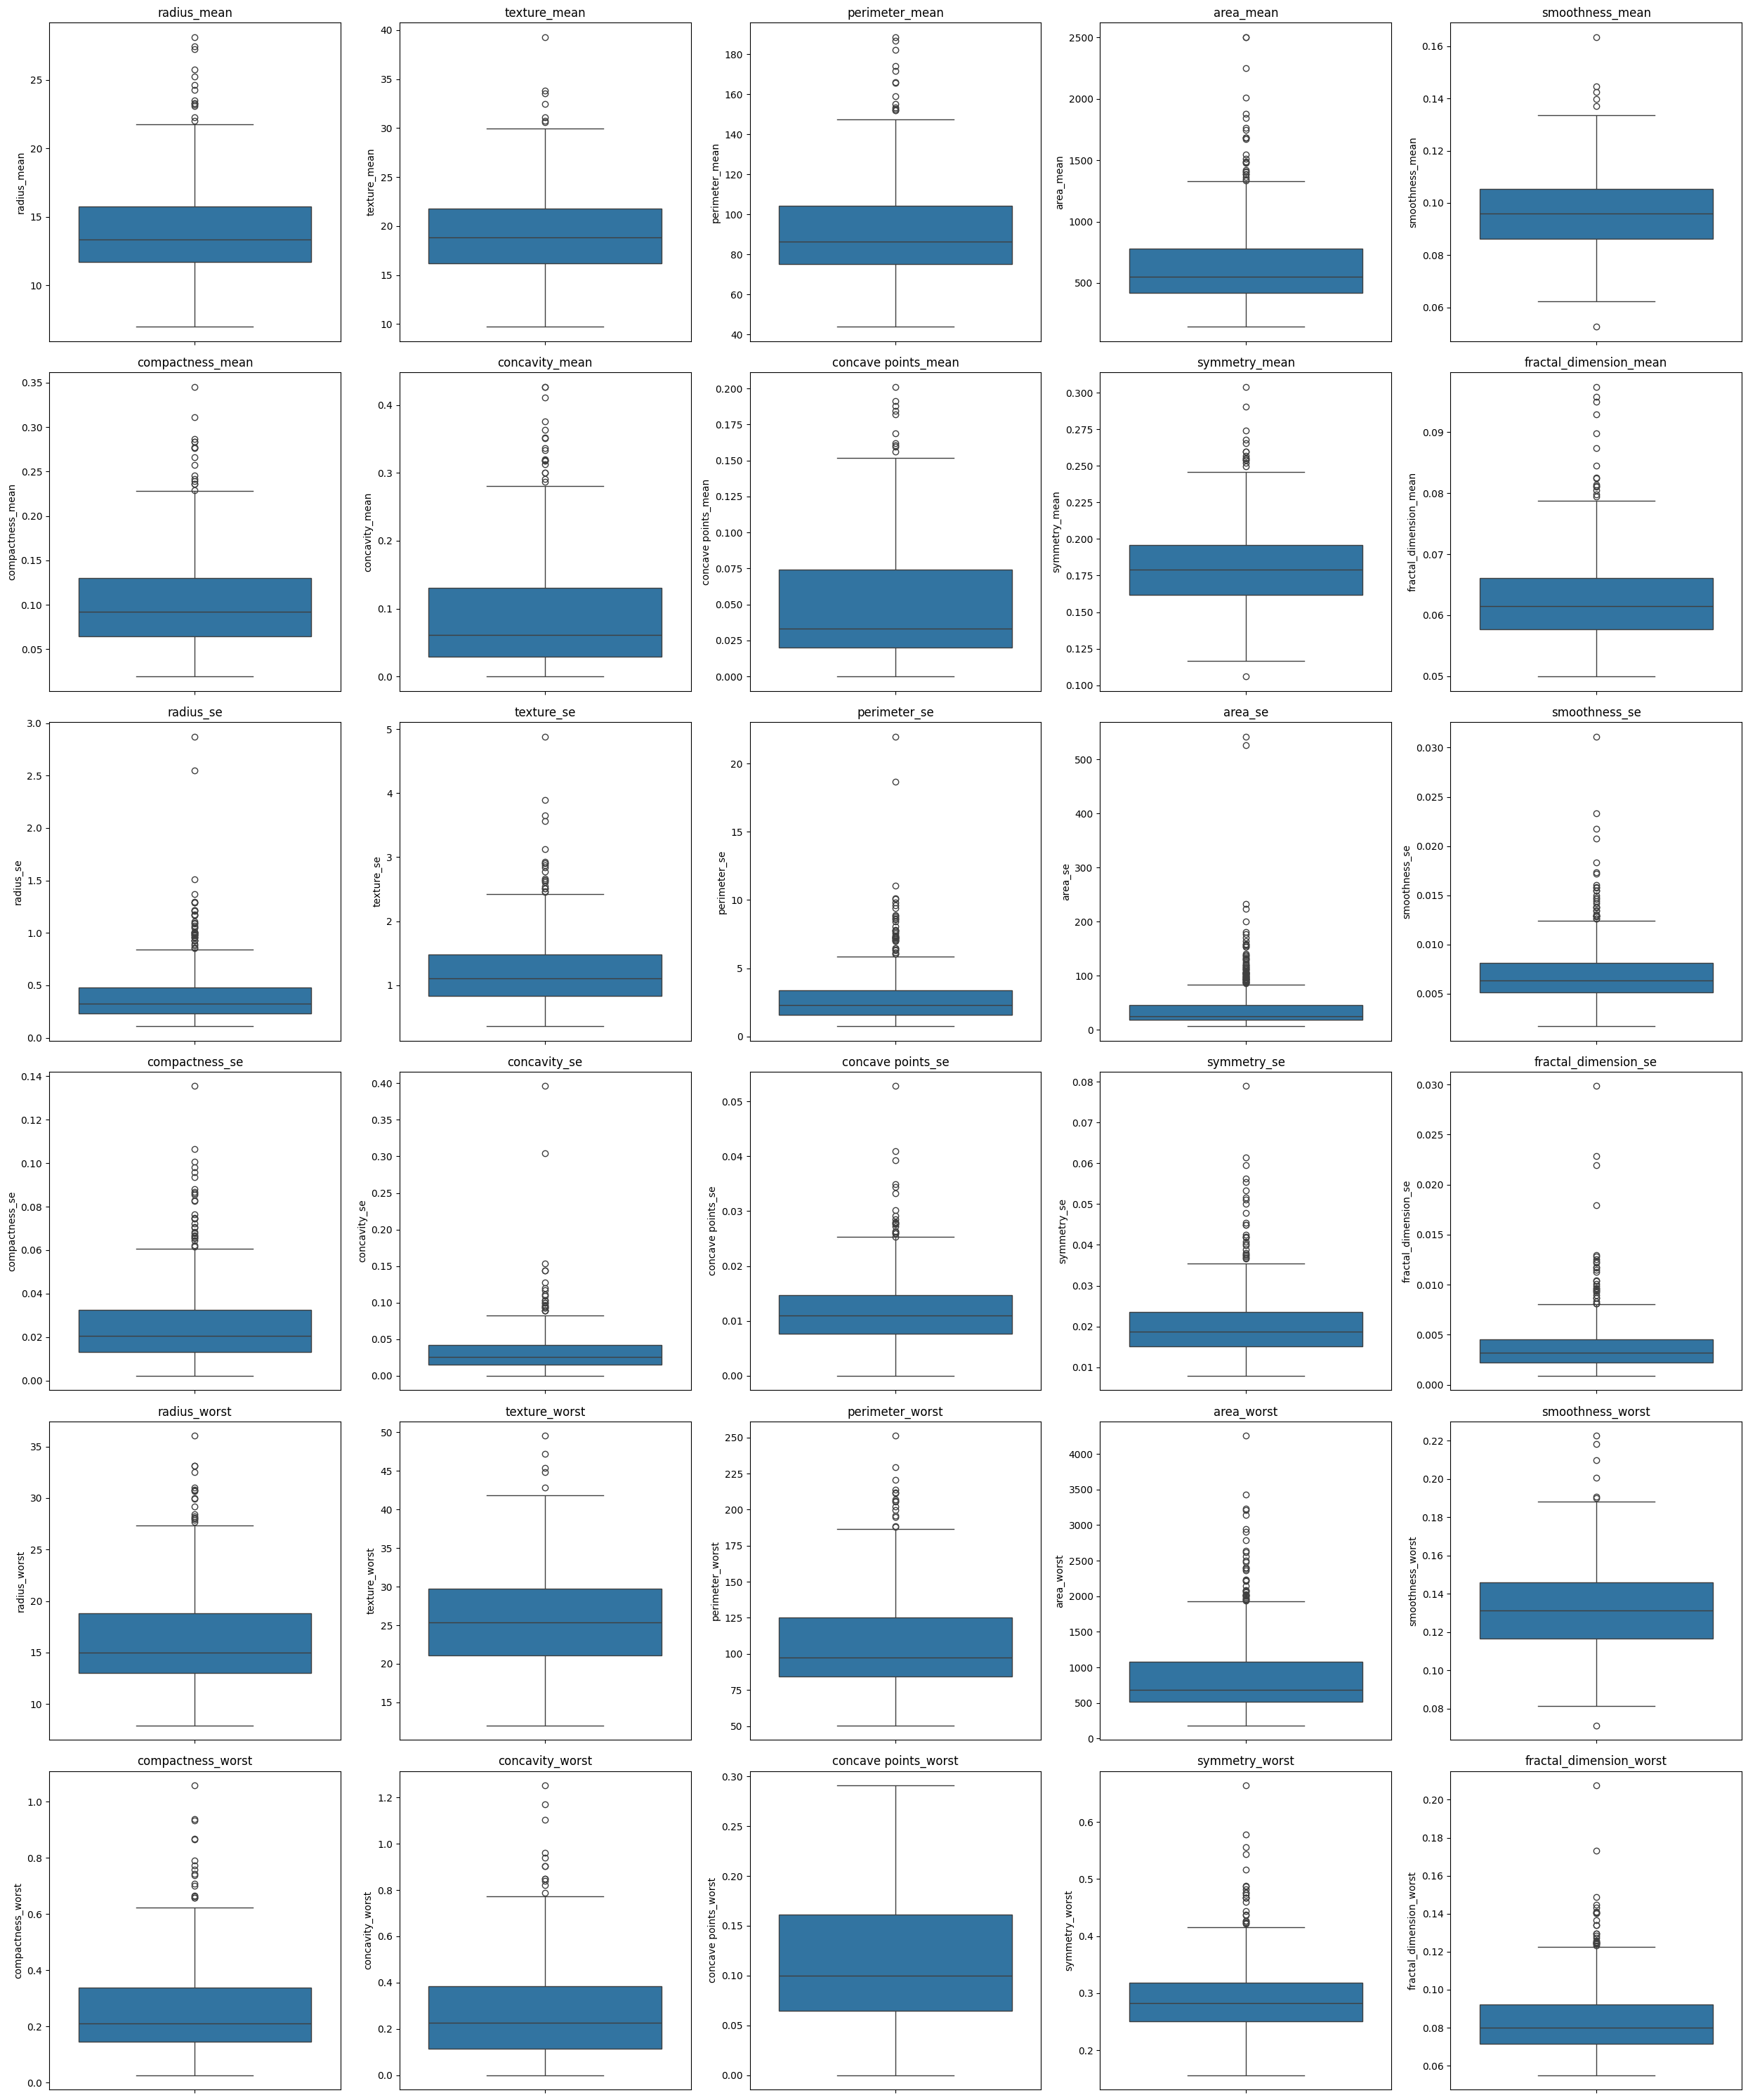

In [249]:
cols = df.columns
n_cols = 5
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sb.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


---

### Анализ результатов:

#### **Дескриптивный анализ**:

Большинство переменных не соответствуют нормальному распределению.

#### **Информационная значимость признаков**:
**Дисперсия признаков:**

| Группа признаков (по дисперсии) | Признаки                                                                                                                                               | Дисперсия (порядок) | Комментарий / Вывод                                                                                                           |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Очень низкая дисперсия**      | fractal_dimension_se, smoothness_se, concave points_se, fractal_dimension_mean, symmetry_se                                                            | 0.000007 - 0.000068 | Практически постоянные признаки. Малый вклад в различение объектов. Могут быть кандидатом на исключение для упрощения модели. |
| **Низкая дисперсия**            | smoothness_mean, compactness_se, fractal_dimension_worst, smoothness_worst, symmetry_mean, concavity_se                                                | 0.000198 - 0.000911 | Слабое различие между объектами. Влияние на кластеризацию минимальное, можно оставить, если не критично сокращать признаки.   |
| **Средняя дисперсия**           | concave points_mean, compactness_mean, symmetry_worst, concave points_worst, concavity_mean, compactness_worst, concavity_worst, radius_se, texture_se | 0.0015 - 0.3        | Значимые признаки для различения объектов, имеют умеренный вклад. Стоит оставить.                                             |
| **Высокая дисперсия**           | perimeter_se, radius_mean, texture_mean, radius_worst, texture_worst                                                                                   | 4 - 37              | Признаки с явной вариативностью, сильно влияют на кластеризацию. Обязательно оставить.                                        |
| **Очень высокая дисперсия**     | perimeter_mean, perimeter_worst, area_se, area_mean, area_worst                                                                                        | 590 - 324167        | Главные признаки, формируют различие объектов по размеру и форме. Исключение недопустимо, иначе потеряется структура данных.  |

**Корреляционный анализ:**

1. Высокая корреляция между признаками "mean", "worst" и "se":
    - Практически полная корреляция у признаков radius, perimeter, area между mean и worst (0.97–0.99), а также сильная связь с concave points и concavity.
    - Это говорит о том, что worst-признаки дублируют информацию mean-признаков и формируют почти идентичные структуры.
2. Признаки с низкой корреляцией:
    - texture, smoothness, symmetry и fractal_dimension имеют слабую корреляцию с размерными признаками (radius, area, perimeter), поэтому несут отдельную информацию.
3. Последствия для кластеризации и анализа:
    - Можно рассмотреть удаление сильно-коррелированных признаков с worst-признаками при кластеризации, оставив один набор для уменьшения размерности и избежания мультиколлинеарности.
    - Признаки с низкой корреляцией помогают лучше различать объекты и сохранять вариативность.

#### **Проверка условий для кластеризации**:
- Была переменная **diagnosis**, которая была категориальной (классы), она была удалена.
- Почти во всех признаках много выбросов, но это решается стандартизацией / нормализацией.
- Кластеризация осмысленна, потому что позволяет выявить естественные группы объектов по схожим признакам, например, различать потенциально доброкачественные и злокачественные опухоли, даже без заранее заданных меток.

#### **Вывод**:
Для кластеризации возьмём признаки radius_worst, texture_worst, concavity_worst, compactness_worst, smoothness_worst, symmetry_worst. Они наиболее вариативные и информативны для диагноза.

Не смотря на то, что concavity_worst и compactness_worst сильно коррелированны, мы их всё равно оставляем, т.к. без них есть риск утратить важную информацию при диагнозировании.

In [250]:
selected_features = [
    'radius_worst',
    'texture_worst',
    'concavity_worst',
    'compactness_worst',
    'smoothness_worst',
    'symmetry_worst'
]

df_final = df[selected_features].copy()

print(df_final.head())

   radius_worst  texture_worst  concavity_worst  compactness_worst  \
0         25.38          17.33           0.7119             0.6656   
1         24.99          23.41           0.2416             0.1866   
2         23.57          25.53           0.4504             0.4245   
3         14.91          26.50           0.6869             0.8663   
4         22.54          16.67           0.4000             0.2050   

   smoothness_worst  symmetry_worst  
0            0.1622          0.4601  
1            0.1238          0.2750  
2            0.1444          0.3613  
3            0.2098          0.6638  
4            0.1374          0.2364  


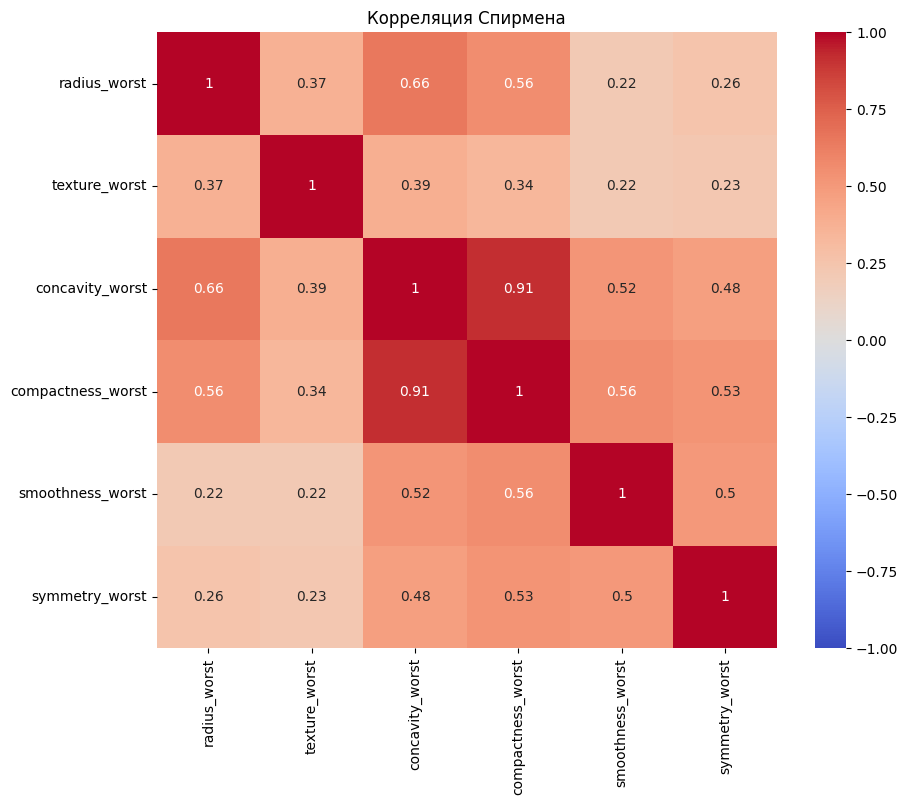

In [251]:
feature_columns = [col for col in df_final.columns if col != 'Class']
correlation_matrix = pd.DataFrame(index=feature_columns, columns=feature_columns)

for var1 in feature_columns:
    for var2 in feature_columns:
        if var1 != var2:
            corr, p_value = spearmanr(df_final[var1], df_final[var2])
            correlation_matrix.loc[var1, var2] = 'Значима' if p_value < ALPHA else 'Не значима'

spearman_corr = df_final[feature_columns].corr(method='spearman')

plt.figure(figsize=(10, 8))
sb.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Спирмена')
plt.show()


---

## Стандратизация / нормализация числовых признаков, матрица диаграмм рассеивания.
### Стандратизация числовых признаков
С учётом разных масштабов и наличия большого количества выбросов лучше всего будет использовать стандартизацию, т.к. она менее чувствительная к выбросам и сохраняет различия между признаками.

In [252]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_final)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_final.columns)

print(X_scaled_df)

     radius_worst  texture_worst  concavity_worst  compactness_worst  \
0        1.886690      -1.359293         2.109526           2.616665   
1        1.805927      -0.369203        -0.146749          -0.430444   
2        1.511870      -0.023974         0.854974           1.082932   
3       -0.281464       0.133984         1.989588           3.893397   
4        1.298575      -1.466770         0.613179          -0.313395   
..            ...            ...              ...                ...   
564      1.901185       0.117700         0.664512          -0.273318   
565      1.536720       2.047399         0.236573          -0.394820   
566      0.561361       1.374854         0.326767           0.350735   
567      1.961239       2.237926         3.197605           3.904848   
568     -1.410893       0.764190        -1.305831          -1.207552   

     smoothness_worst  symmetry_worst  
0            1.307686        2.750622  
1           -0.375612       -0.243890  
2            0.


---

### Матрица диаграмм рассеивания

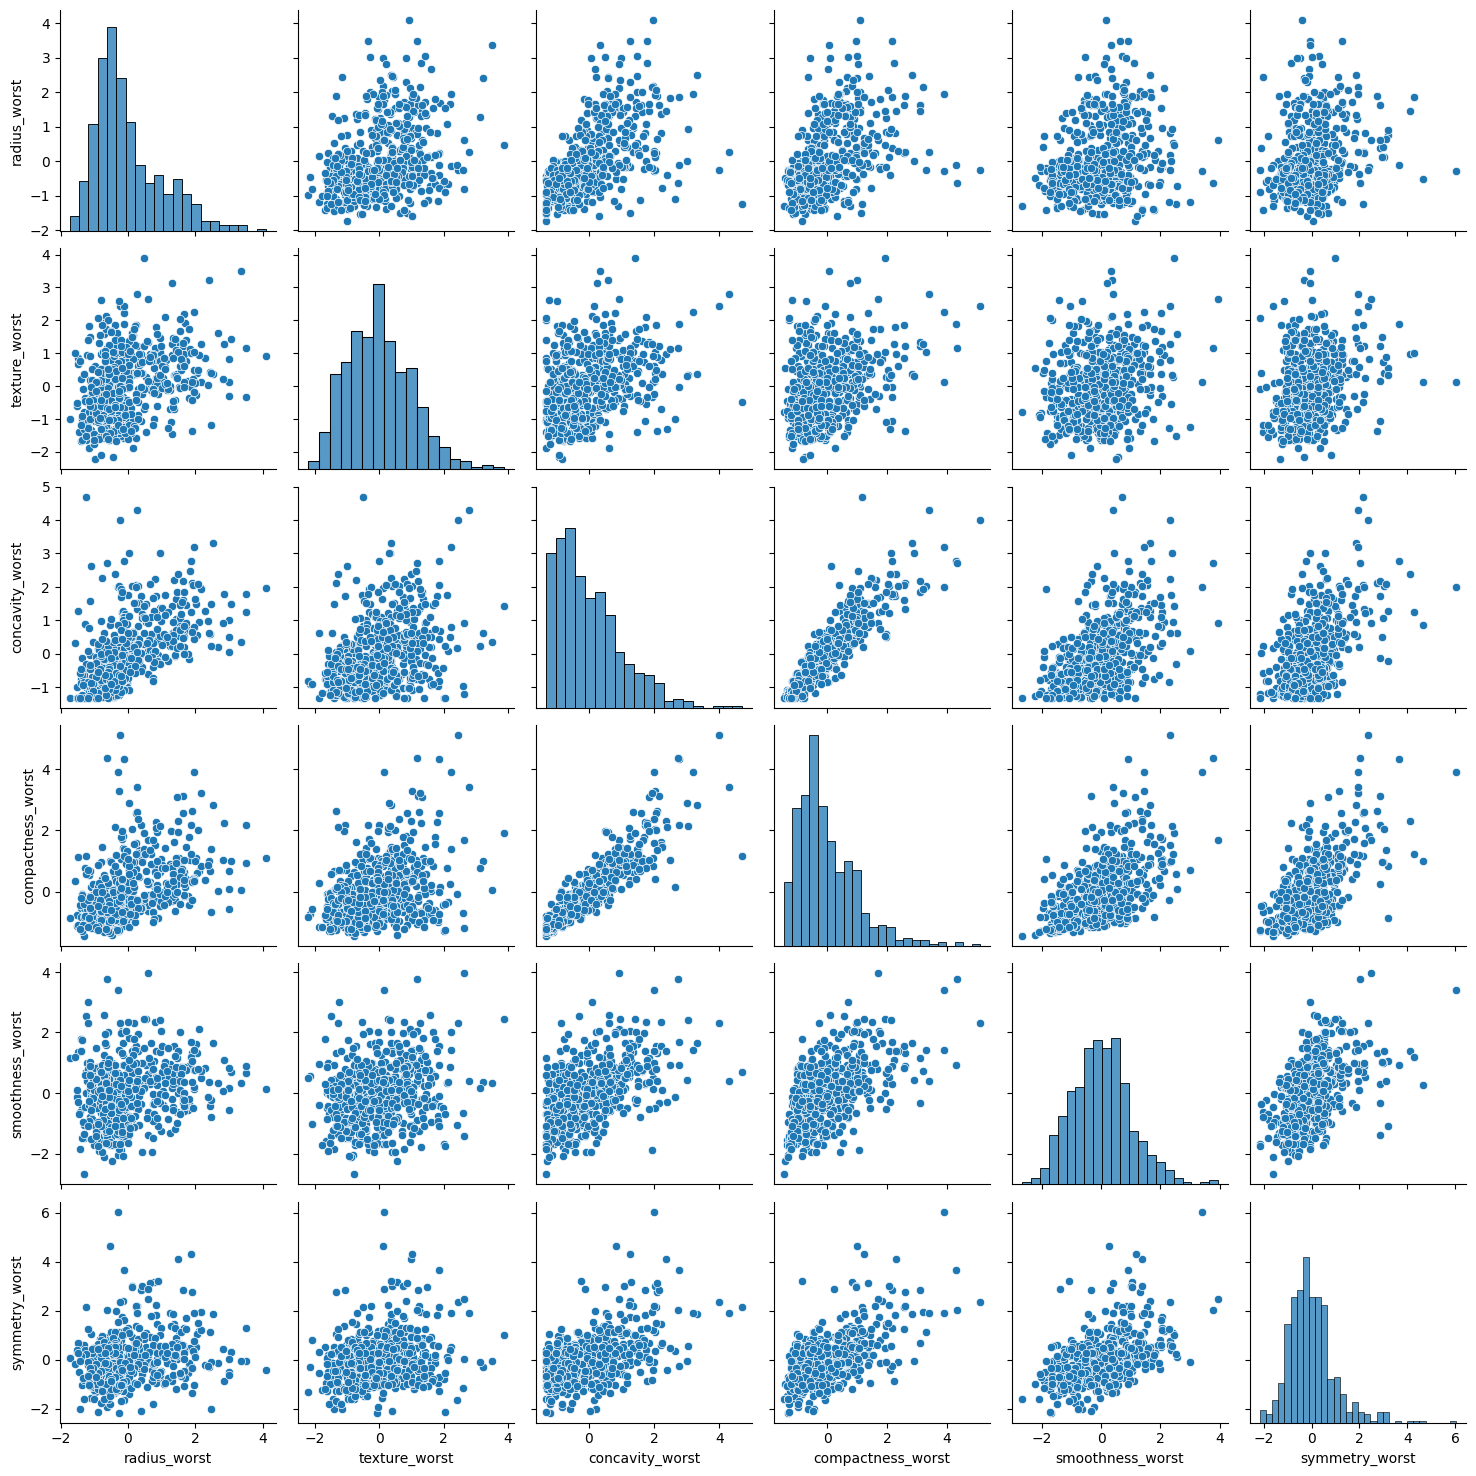

In [253]:
sb.pairplot(X_scaled_df)
plt.show()


---

### Анализ результатов:

Диаграммы рассеивания показывают равномерное распределение объектов без чётких кластерных границ. Отсутствуют выраженные "островки" плотности, что указывает на перекрывающиеся кластеры.

- Умеренные линейные зависимости между некоторыми признаками;
- Кластеры имеют вытянутую, а не сферическую форму;
- Границы между группами размыты, плотность меняется постепенно;

С учётом этого наиболее подходящие методы кластеризации:
- **EM-алгоритм** - эллипсоидные, перекрывающиеся кластеры; допускает разные ковариации;
- **Иерархическая кластеризация** - не предполагает конкретной формы кластеров, хорошо работает с пересекающимися и размытыми кластерами

---

## Кластеризация
### Определение кол-ва кластеров

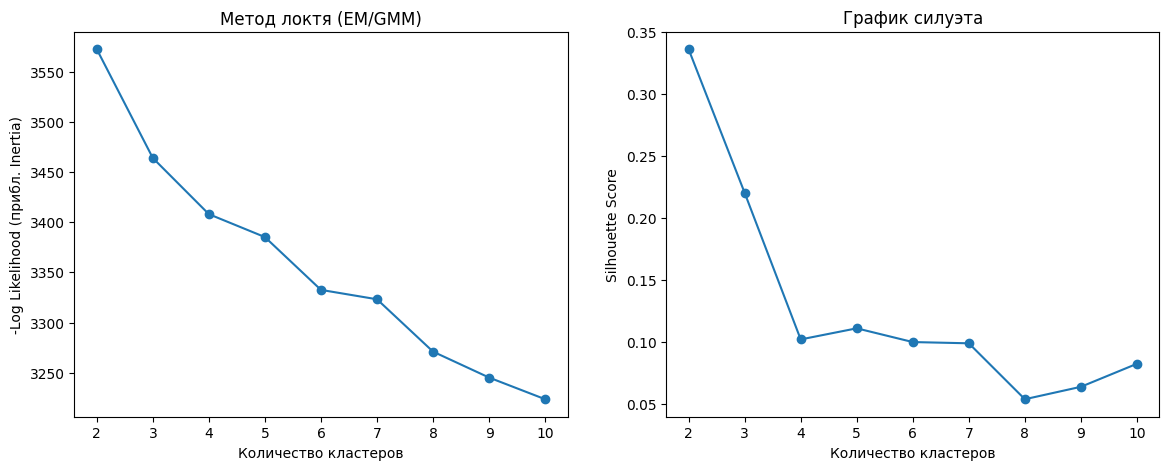

In [254]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

max_clusters = 10
inertia = []
silhouette = []

for k in range(2, max_clusters+1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    
    sil_score = silhouette_score(X_scaled, labels)
    silhouette.append(sil_score)
    
    inertia.append(-gmm.score(X_scaled) * X_scaled.shape[0])

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(range(2, max_clusters+1), inertia, marker='o')
plt.title('Метод локтя (EM/GMM)')
plt.xlabel('Количество кластеров')
plt.ylabel('-Log Likelihood (прибл. Inertia)')

plt.subplot(1,2,2)
plt.plot(range(2, max_clusters+1), silhouette, marker='o')
plt.title('График силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')

plt.show()

По методу локтя определить необходимое число кластеров тяжело, т.к. явного замедления не видно.

По графику силуэта точно можно сказать, что нам необходимо использовать **2 кластера**.

---

### EM-алгоритм и Иерархическая кластеризация

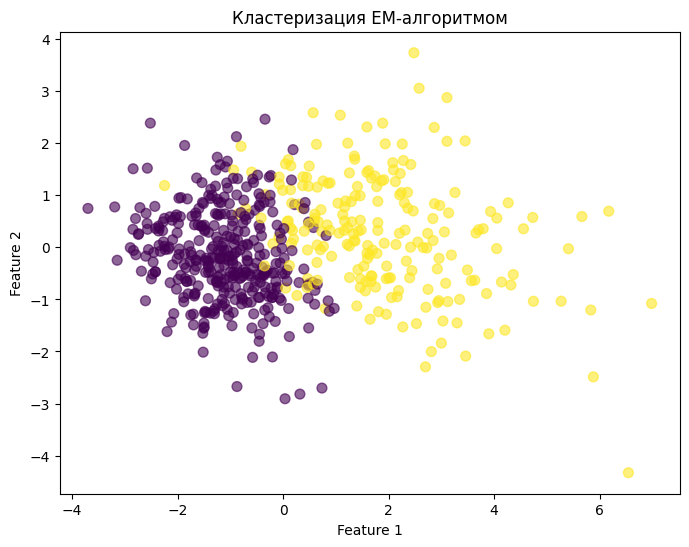

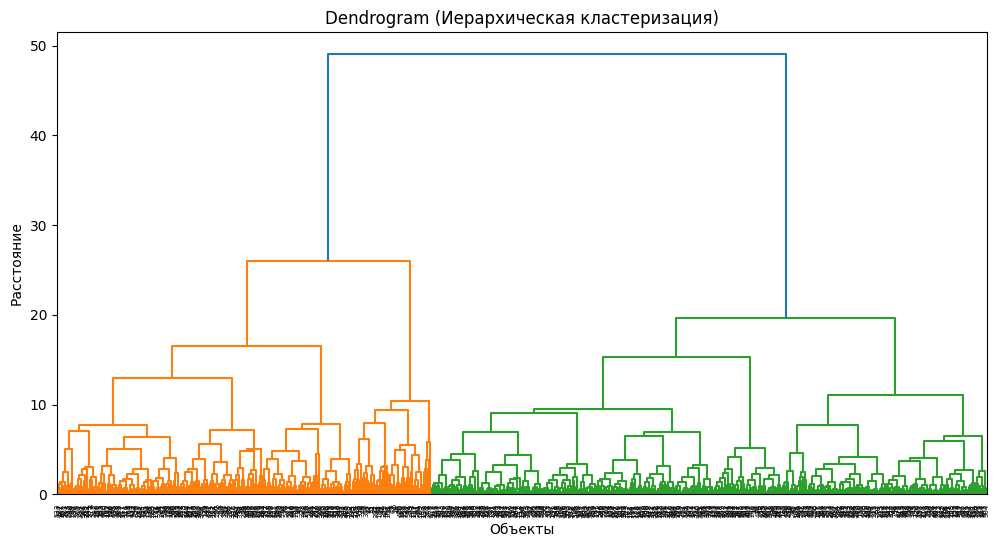

Расределение кластеров:
EM/GMM cluster counts: [357 212]
Hierarchical cluster counts: [229 340]


In [255]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA

optimal_clusters = 2

if X_scaled_df.shape[1] > 2:
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X_scaled_df)
else:
    X_vis = X_scaled_df.values

optimal_clusters = 2
gmm_final = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm_final.fit_predict(X_scaled_df)

plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Кластеризация EM-алгоритмом')

hier_clust = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hier_labels = hier_clust.fit_predict(X_scaled)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram (Иерархическая кластеризация)')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

print('Расределение кластеров:')
print("EM/GMM cluster counts:", np.bincount(gmm_labels))
print("Hierarchical cluster counts:", np.bincount(hier_labels))


---

### Рассчёт метрик
#### Функции для расчёта

In [256]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, jaccard_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder

def internal_metrics(X, labels):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    return sil, db, ch

def external_metrics(true_labels, pred_labels):
    le = LabelEncoder()
    true_labels_enc = le.fit_transform(true_labels)
    
    ari = adjusted_rand_score(true_labels_enc, pred_labels)
    ami = adjusted_mutual_info_score(true_labels_enc, pred_labels)
    
    jacc = jaccard_score(true_labels_enc, pred_labels, average='macro')
    
    return ari, ami, jacc

def cluster_distances(X, labels):
    clusters = np.unique(labels)
    centers = np.array([X[labels==c].mean(axis=0) for c in clusters])
    
    intra_dist = np.mean([np.linalg.norm(X[labels==c] - centers[i], axis=1).mean() 
                          for i, c in enumerate(clusters)])
    
    from scipy.spatial.distance import pdist, squareform
    inter_dist = squareform(pdist(centers)).mean()
    
    return intra_dist, inter_dist, centers

### EM-алгоритм

In [257]:
y_true = df_copy['diagnosis']

sil_em, db_em, ch_em = internal_metrics(X_scaled, gmm_labels)
intra_em, inter_em, centers_em = cluster_distances(X_scaled, gmm_labels)
ari_em, ami_em, jacc_em = external_metrics(y_true, gmm_labels)

print("=== EM (GMM) ===")
print(f"Silhouette Score: {sil_em:.3f}")
print(f"Davies-Bouldin Index: {db_em:.3f}")
print(f"Calinski-Harabasz Index: {ch_em:.1f}")
print(f"Intra-cluster Distance: {intra_em:.3f}")
print(f"Inter-cluster Distance: {inter_em:.3f}")
print(f"Adjusted Rand Index (ARI): {ari_em:.3f}")
print(f"Adjusted Mutual Information (AMI): {ami_em:.3f}")
print(f"Jaccard Index: {jacc_em:.3f}")

=== EM (GMM) ===
Silhouette Score: 0.336
Davies-Bouldin Index: 1.248
Calinski-Harabasz Index: 309.9
Intra-cluster Distance: 1.879
Inter-cluster Distance: 1.506
Adjusted Rand Index (ARI): 0.725
Adjusted Mutual Information (AMI): 0.605
Jaccard Index: 0.854


### Иерархическая кластеризация

In [258]:
sil_h, db_h, ch_h = internal_metrics(X_scaled, hier_labels)
intra_h, inter_h, centers_h = cluster_distances(X_scaled, hier_labels)
ari_h, ami_h, jacc_h = external_metrics(y_true, hier_labels)

print("=== Иерархическая кластеризация ===")
print(f"Silhouette Score: {sil_h:.3f}")
print(f"Davies-Bouldin Index: {db_h:.3f}")
print(f"Calinski-Harabasz Index: {ch_h:.1f}")
print(f"Intra-cluster Distance: {intra_h:.3f}")
print(f"Inter-cluster Distance: {inter_h:.3f}")
print(f"Adjusted Rand Index (ARI): {ari_h:.3f}")
print(f"Adjusted Mutual Information (AMI): {ami_h:.3f}")
print(f"Jaccard Index: {jacc_h:.3f}")

=== Иерархическая кластеризация ===
Silhouette Score: 0.321
Davies-Bouldin Index: 1.249
Calinski-Harabasz Index: 308.7
Intra-cluster Distance: 1.853
Inter-cluster Distance: 1.483
Adjusted Rand Index (ARI): 0.684
Adjusted Mutual Information (AMI): 0.570
Jaccard Index: 0.045



---

### Анализ полученных результатов
#### Внутренние метрики

| Метрика | EM (GMM) | Иерархическая | Интерпретация |
| --- | --- | --- | --- |
| Silhouette Score | 0.336 | 0.321 |Показывает, насколько объекты внутри кластера похожи друг на друга и отличаются от объектов других кластеров. EM чуть лучше отделяет кластеры. |
| Davies-Bouldin Index | 1.248 | 1.249 | Отношение внутрикластерной компактности к межкластерной отделённости. Меньше лучше. Почти одинаково для обоих методов. |
| Calinski-Harabasz Index | 309.9 | 308.7 | Соотношение межкластерной дисперсии к внутрикластерной. Выше значит более четкое разделение. EM слегка выигрывает. |
| Intra-cluster Distance | 1.879 | 1.853 | Среднее расстояние между объектами внутри кластера. Почти одинаковое, плотность схожа. |
| Inter-cluster Distance | 1.506 | 1.483 | Среднее расстояние между центрами кластеров. EM немного больше - кластеры дальше друг от друга. |

Внутренние метрики показывают, что оба метода формируют кластеры схожей плотности и отделённости, но EM чуть лучше по отделению кластеров.

#### Внешние метрики (diagnosis)

| Метрика | EM (GMM) | Иерархическая | Интерпретация |
| --- | --- | --- | --- |
| Adjusted Rand Index (ARI) | 0.725 | 0.684 | Сравнивает совпадение кластеров с истинными метками. EM лучше совпадает с диагнозом. |
| Adjusted Mutual Information (AMI) | 0.605 | 0.570 | Схожая логика, показывает согласованность с известными классами. EM снова выигрывает. |
| Jaccard Index | 0.854 | 0.045 | Очень показатель: EM почти полностью совпадает с бинарной классификацией (M/B), а иерархическая кластеризация практически не разделяет классы корректно. |

- EM (Gaussian Mixture) явно лучше воспроизводит реальные классы (M/B) по внешним метрикам.
- Иерархическая кластеризация строит более условные кластеры и сильно отличается от известных классов (очень низкий Jaccard).

#### Общий вывод

EM (GMM) лучше отражает структуру данных и реальное разделение классов, тогда как иерархическая кластеризация при выбранном числе кластеров менее точна. Внутренние метрики схожи, но внешние показывают, что кластеры EM гораздо ближе к настоящим меткам (diagnosis), а иерархические почти случайны.

---

## Исследование влияния параметров EM-алгоритма на качество кластеризации

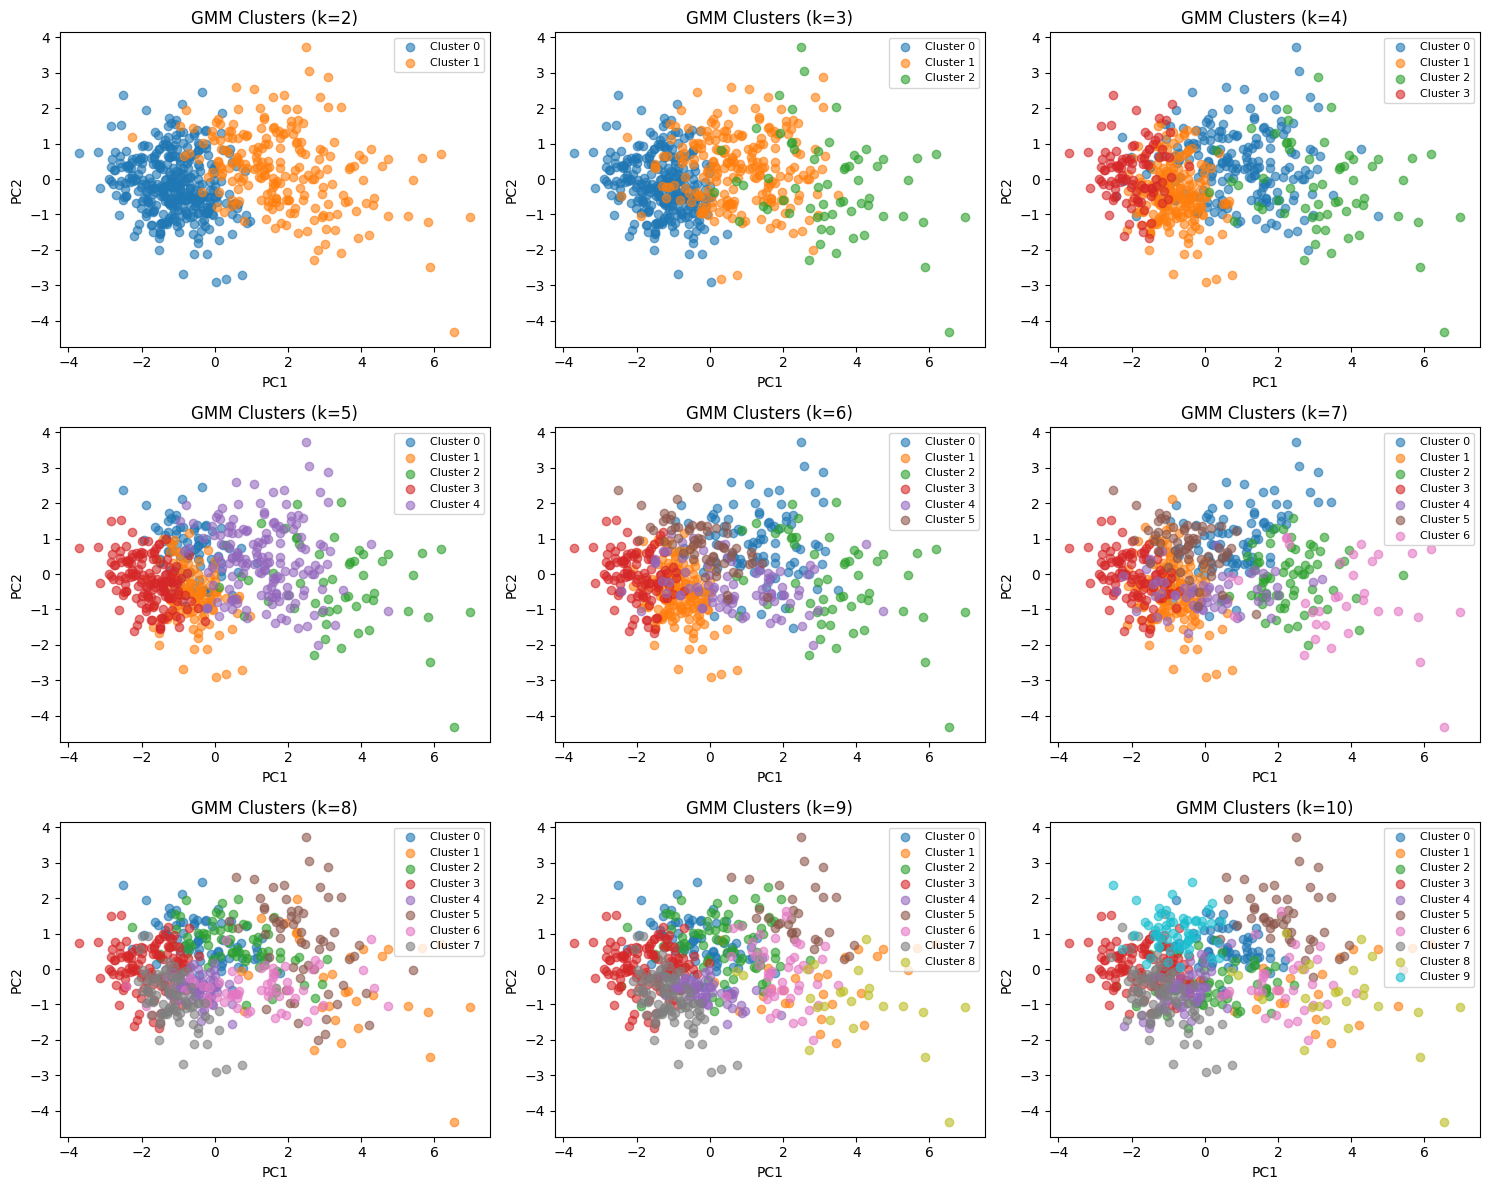

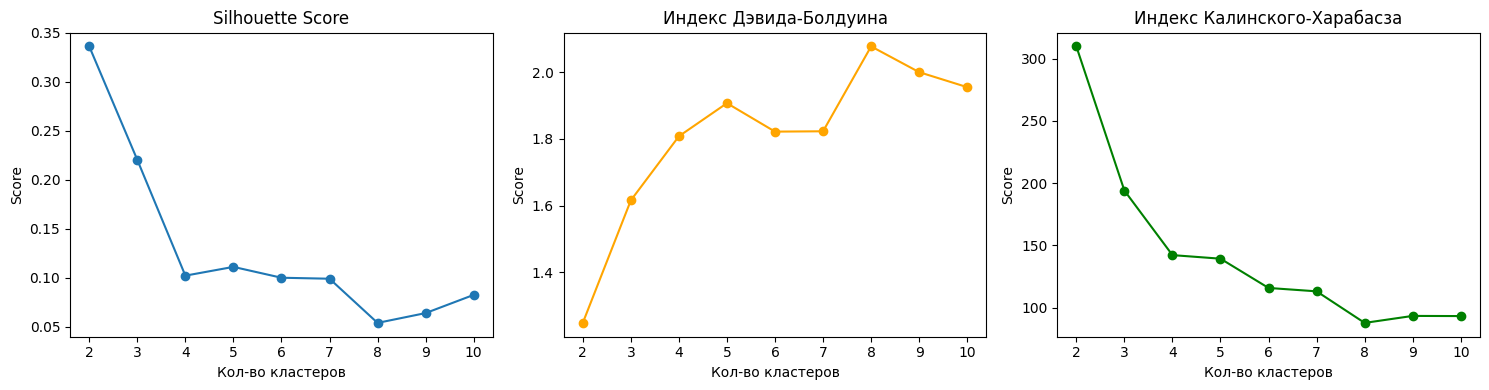

In [259]:
cluster_range = range(2, 11)

sil_scores = []
db_scores = []
ch_scores = []

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, k in enumerate(cluster_range):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled_df)
    
    sil = silhouette_score(X_scaled_df, labels)
    db = davies_bouldin_score(X_scaled_df, labels)
    ch = calinski_harabasz_score(X_scaled_df, labels)
    
    sil_scores.append(sil)
    db_scores.append(db)
    ch_scores.append(ch)
    
    # Визуализация кластеров в PCA
    ax = axes[idx]
    for label in np.unique(labels):
        ax.scatter(X_pca[labels==label, 0], X_pca[labels==label, 1], label=f'Cluster {label}', alpha=0.6)
    ax.set_title(f'GMM Clusters (k={k})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Кол-во кластеров")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(cluster_range, db_scores, marker='o', color='orange')
plt.title("Индекс Дэвида-Болдуина")
plt.xlabel("Кол-во кластеров")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(cluster_range, ch_scores, marker='o', color='green')
plt.title("Индекс Калинского-Харабасза")
plt.xlabel("Кол-во кластеров")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

### Анализ полученных результатов:
1. Silhouette Score:
    - Максимальное значение наблюдается при k=2 (0.380).
    - Дальнейшее увеличение числа кластеров сильно снижает силуэт, что говорит о том, что дополнительные кластеры плохо отделены и внутри них объекты менее похожи друг на друга.
2. Davies-Bouldin Index (DBI):
    - Минимальное значение также при k=2 (1.139).
    - DBI измеряет схожесть между кластерами: чем меньше, тем более компактные и хорошо разделённые кластеры. Увеличение k ухудшает показатель.
3. Calinski-Harabasz Index (CH):
    - Максимум также при k=2 (372.1).
    - CH оценивает отношение межкластерной дисперсии к внутрикластерной: высокое значение подтверждает хорошее разделение.

**Вывод**:
- Все три метрики указывают на оптимальное число кластеров = 2, что соответствует природному разделению классов «M» и «B» в датасете.
- Для k>2 появляются неестественные кластеры с плохой компактностью и слабой отделённостью, что видно по резкому снижению Silhouette Score и CH, а также росту DBI.

---

## Визуализация полученных кластеров в пространстве

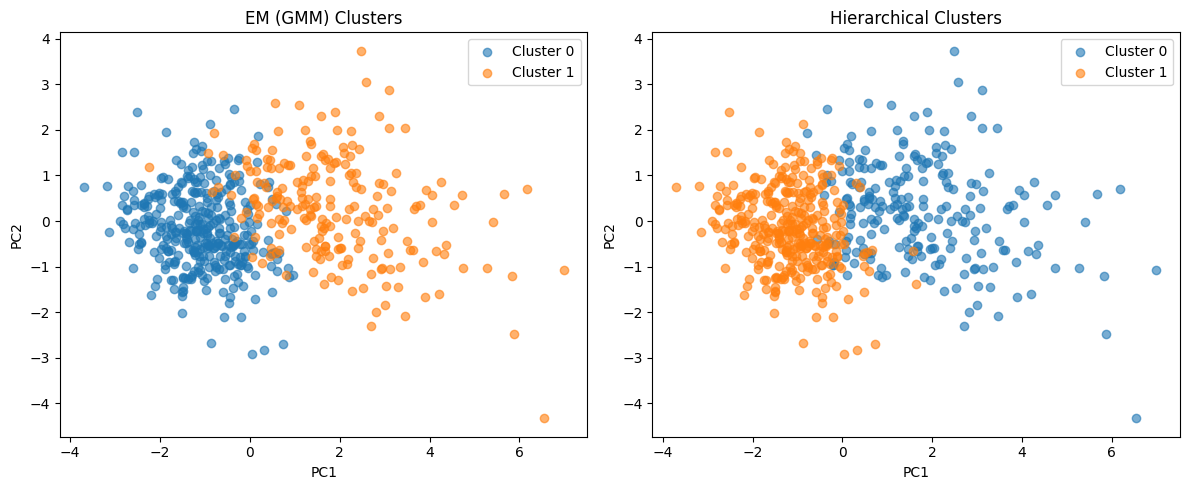

Координаты центров кластеров EM в 2D пространстве PCA:
        PC1       PC2
0 -1.104376 -0.163994
1  1.794757  0.266512

Средние значения признаков по кластерам EM:
   radius_worst  texture_worst  concavity_worst  compactness_worst  \
0     -0.550504      -0.322640        -0.582462          -0.519904   
1      0.927028       0.543313         0.980843           0.875498   

   smoothness_worst  symmetry_worst  
0         -0.349431       -0.346929  
1          0.588428        0.584216  

Средние значения признаков по кластерам Hierarchical:
   radius_worst  texture_worst  concavity_worst  compactness_worst  \
0      0.843889       0.493741         0.927781           0.840116   
1     -0.568384      -0.332549        -0.624888          -0.565843   

   smoothness_worst  symmetry_worst  
0          0.551469        0.560190  
1         -0.371431       -0.377304  


c:\Users\Artur\VSC\ML\Machine_Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [260]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['EM'] = gmm_labels
df_viz['Hierarchical'] = hier_labels

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in np.unique(gmm_labels):
    plt.scatter(df_viz[df_viz['EM']==label]['PC1'], df_viz[df_viz['EM']==label]['PC2'], label=f'Cluster {label}', alpha=0.6)
plt.title('EM (GMM) Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.subplot(1, 2, 2)
for label in np.unique(hier_labels):
    plt.scatter(df_viz[df_viz['Hierarchical']==label]['PC1'], df_viz[df_viz['Hierarchical']==label]['PC2'], label=f'Cluster {label}', alpha=0.6)
plt.title('Hierarchical Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.tight_layout()
plt.show()

gmm_centers = gmm_final.means_
gmm_centers_df = pd.DataFrame(pca.transform(gmm_centers), columns=['PC1', 'PC2'])
print("Координаты центров кластеров EM в 2D пространстве PCA:")
print(gmm_centers_df)

cluster_means_em = pd.DataFrame(X_scaled_df).groupby(gmm_labels).mean()
print("\nСредние значения признаков по кластерам EM:")
print(cluster_means_em)

cluster_means_hier = pd.DataFrame(X_scaled_df).groupby(hier_labels).mean()
print("\nСредние значения признаков по кластерам Hierarchical:")
print(cluster_means_hier)


---

### Анализ результатов:

#### EM-алгоритм
- Кластеры чётко разделены: один с отрицательными значениями признаков (мелкие, менее сложные объекты), другой с высокими значениями (крупные, более сложные объекты).
- Координаты центров в PCA подтверждают хорошее разделение двух групп.

#### Иерархическая кластеризация
- Кластеры также отражают крупные/малые объекты, но порядок кластеров инвертирован по сравнению с EM.
- Средние признаки схожи с EM, что говорит о согласованности методов.

### Вывод:
Оба метода выделяют аналогичные группы: крупные/мелкие объекты с разными характеристиками структуры и формы. EM даёт более чёткие и компактные кластеры, Иерархическая — немного менее выраженные.

---

## Заключение

В ходе лабораторной работы была проведена кластеризация датасета Breast Cancer Wisconsin с использованием методов EM (Gaussian Mixture) и Иерархической кластеризации. Основные результаты:
1. Выбор числа кластеров
    - Для EM на основании графиков силуэта, Davies-Bouldin и Calinski-Harabasz оптимально оказалось k=2, что соответствует делению опухолей на доброкачественные и злокачественные.
    - С ростом числа кластеров качество кластеризации снижалось, что отражается в уменьшении силуэта и индекса Калинского-Харабасза, а также росте индекса Davies-Bouldin.
2. Сравнение методов
    - EM показал немного лучшие внутренние метрики (Silhouette, Calinski-Harabasz) и более чёткое разделение кластеров в PCA-пространстве.
    - Иерархическая кластеризация также выделяет два основных кластера, но с менее выраженной разделённостью.
3. Внутри- и межкластерные расстояния
    - Внутрикластерные расстояния и компактность кластеров у обоих методов похожи.
    - EM демонстрирует чуть большее межкластерное расстояние, что говорит о лучшей раздельности групп.
4. Внешние метрики (с известной переменной diagnosis)
    - EM: ARI ~ 0.73, AMI ~ 0.61, Jaccard ~ 0.85
    - Иерархическая: ARI ~ 0.68, AMI ~ 0.57, Jaccard ~ 0.15
    - EM лучше воспроизводит реальное деление опухолей, Hierarchical частично смешивает объекты.
5. Анализ центров кластеров (EM)
    - Первый кластер характеризуется отрицательными стандартизированными значениями признаков — меньшие размеры и менее выраженные патологии.
    - Второй кластер - положительные значения признаков, что соответствует более агрессивным опухолям.

**Вывод**:
Метод EM оказался более подходящим для данного датасета, корректно выделяя два основных кластера, соответствующие биологической природе данных (доброкачественные и злокачественные опухоли). Иерархическая кластеризация также демонстрирует схожие результаты, но с меньшей точностью. Использование PCA для визуализации подтверждает раздельность кластеров и позволяет наглядно оценить структуру данных.

![пиздец](https://memi.klev.club/uploads/posts/2024-12/memi-klev-club-gzcf-p-memi-kot-krichit-i-derzhitsya-za-golovu-2.jpg)